In [1]:
# installing libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

In [6]:
import pandas as pd

# Set file paths
file_path1 = r"C:\Users\jilow\Machine_learning_assignment1\Genetic_disorder_data\test.csv"
file_path2 = r"C:\Users\jilow\Machine_learning_assignment1\Genetic_disorder_data\train.csv"

# Combine the train and test data for exploration and cleaning
train_data = pd.read_csv(file_path2)  # Use file_path2 for train.csv
test_data = pd.read_csv(file_path1)   # Use file_path1 for test.csv

# Combine them into one dataset
data = pd.concat([train_data, test_data], axis=0)

# Preview the first few rows
print(data.head())


  Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           NaN           Yes                4.720703            Johanna   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre  ...            NaN

In [9]:
# EDA: Summary of the data
print(data.describe())

        Patient Age  Blood cell count (mcL)  Mother's age  Father's age  \
count  30121.000000            31548.000000  25512.000000  25562.000000   
mean       6.995418                4.899272     34.544646     41.920233   
std        4.325345                0.199510      9.845861     13.037442   
min        0.000000                4.092727     18.000000     20.000000   
25%        3.000000                4.763948     26.000000     30.000000   
50%        7.000000                4.899315     35.000000     42.000000   
75%       11.000000                5.033619     43.000000     53.000000   
max       14.000000                5.676184     51.000000     64.000000   

             Test 1        Test 2        Test 3        Test 4        Test 5  \
count  29421.000000  29396.000000  29401.000000  29408.000000  29378.000000   
mean      -7.133680     -7.008403     -7.067821     -6.079706     -7.046395   
std       25.600141     25.391654     25.490827     25.648991     25.455127   
min     

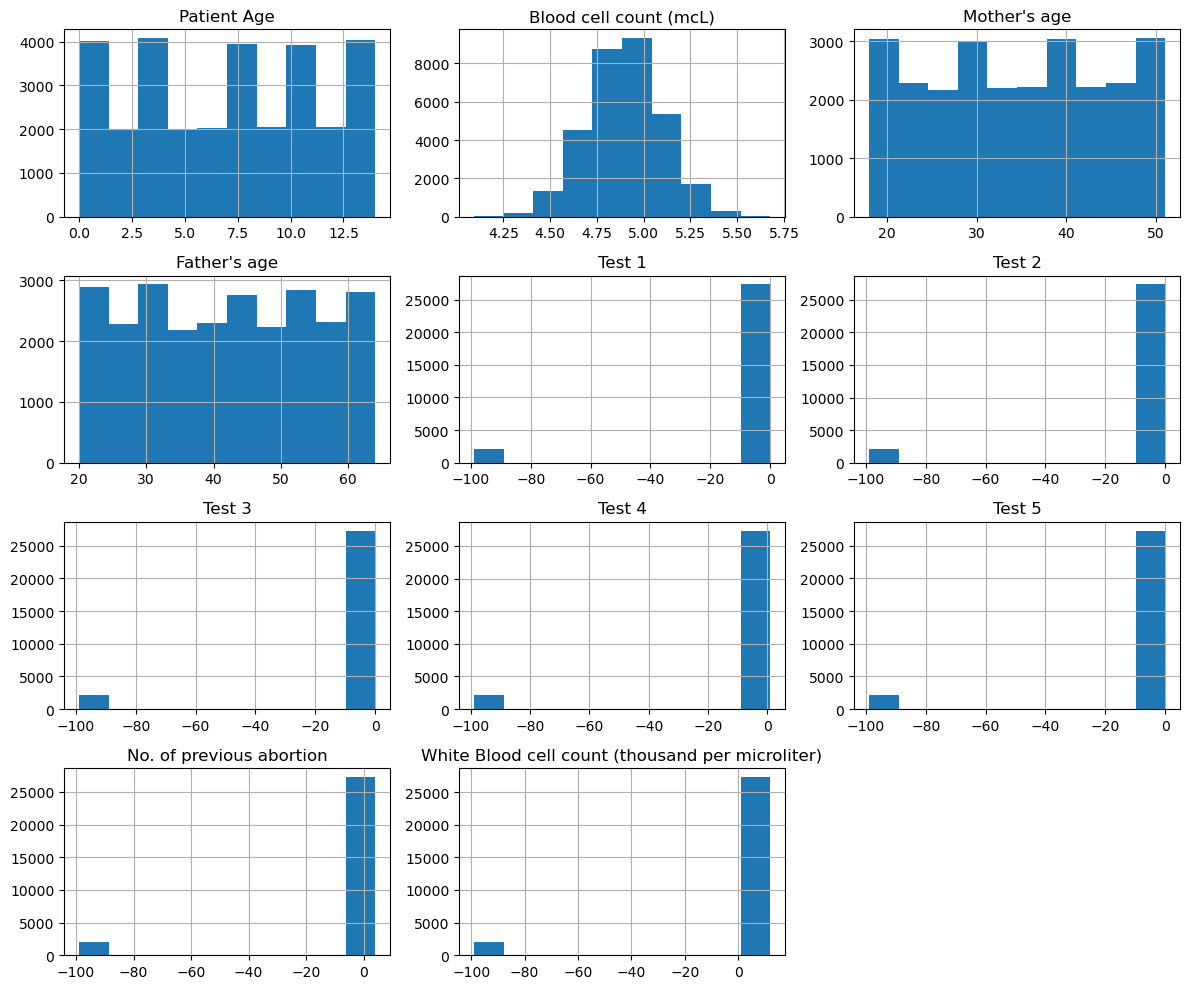

In [8]:
#EDA: understand data distribution of numerical features
import matplotlib.pyplot as plt
data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

In [48]:
# Strip extra spaces from column names
data.columns = data.columns.str.strip()

# Verify the column names
print(data.columns)

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
sns.boxplot(x='Genetic Disorder', y='Patient Age', data=data)
plt.title('Box plot of Patient Age by Genetic Disorder')
plt.show()


In [72]:
# Check for missing data in the target and feature columns
print(data[['Genetic Disorder', 'Patient Age']].isnull().sum())

# Check for unique values in the target variable
print(data['Genetic Disorder'].unique())


Genetic Disorder    0.0
Patient Age         0.0
dtype: float64
[]


In [73]:
# Drop rows where Genetic Disorder is missing
data = data.dropna(subset=['Genetic Disorder'])

# Verify the change
print(data['Genetic Disorder'].isnull().sum())  # Should be 0


0


In [74]:
# Replace NaN in Patient Age with the mean
data['Patient Age'] = data['Patient Age'].fillna(data['Patient Age'].mean())

# Verify that there are no more missing values
print(data['Patient Age'].isnull().sum())  # Should be 0


0


In [75]:
data['Patient Age'] = pd.to_numeric(data['Patient Age'], errors='coerce')  # Convert to numeric, forcing errors to NaN


In [ ]:
sns.pairplot(data)
plt.show()

C:\Users\jilow\anaconda3\lib\site-packages\seaborn\axisgrid.py:1278: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


In [78]:
import numpy as np

# Check for missing values
print("\nMissing values before cleaning:\n")
print(data.isnull().sum())

# Replace -99 with NaN for proper handling of missing data
data.replace(-99, np.nan, inplace=True)

# Check the percentage of missing values
missing_percentage = data.isnull().mean() * 100
print("\nPercentage of missing values per column:\n")
print(missing_percentage)

# Impute missing values for numerical features with the median
num_features = [
    'Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age",
    'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
    'No. of previous abortion', 'White Blood cell count (thousand per microliter)'
]
for col in num_features:
    data[col].fillna(data[col].median(), inplace=True)

# Create a new feature: Parental Average Age
data['Parental Average Age'] = (data["Mother's age"] + data["Father's age"]) / 2

# Impute missing values for categorical columns with the mode
categorical_cols = [
    'Gender', 'Birth asphyxia', 'Place of birth', 'Inherited from father', 'Maternal gene'
]
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Drop non-informative columns
data.drop(['Patient Id', 'Patient First Name', 'Family Name', 'Institute Name', 
           'Symptom 2', 'Disorder Subclass'], axis=1, inplace=True)

# Map descriptive values to numbers for respiratory rate and heart rate
data['Respiratory Rate (breaths/min)'] = data['Respiratory Rate (breaths/min)'].map({
    'Normal (30-60)': 45, 'Tachypnea': 65
})
data['Heart Rate (rates/min'] = data['Heart Rate (rates/min'].map({
    'Normal': 70, 'Tachycardia': 100
})

# Fill missing values for mapped columns with the median
data['Respiratory Rate (breaths/min)'].fillna(data['Respiratory Rate (breaths/min)'].median(), inplace=True)
data['Heart Rate (rates/min'].fillna(data['Heart Rate (rates/min'].median(), inplace=True)

# Verify the dataset after cleaning
print("\nRemaining missing values after cleaning:\n")
print(data.isnull().sum())

# Display the first few rows of the cleaned dataset
print("\nCleaned dataset:\n")
print(data.head())



Missing values before cleaning:

Patient Id                                          0.0
Patient Age                                         0.0
Genes in mother's side                              0.0
Inherited from father                               0.0
Maternal gene                                       0.0
Paternal gene                                       0.0
Blood cell count (mcL)                              0.0
Patient First Name                                  0.0
Family Name                                         0.0
Father's name                                       0.0
Mother's age                                        0.0
Father's age                                        0.0
Institute Name                                      0.0
Location of Institute                               0.0
Status                                              0.0
Respiratory Rate (breaths/min)                      0.0
Heart Rate (rates/min                               0.0
Test 1        

KeyError: 0